# Importing libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating fake inputs

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


# Creating fake targets

In [3]:
noise = np.random.uniform(-1, 1, (observations, 1))

targets = 2*xs - 3*zs + 5 + noise # function used for modelling relations between targets and inputs
print(targets.shape)

(1000, 1)


# Plotting

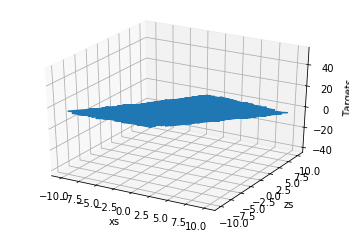

In [4]:
targets = targets.reshape(observations,) # Changing shape for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=300)
plt.show()
targets = targets.reshape(observations,1) # Restoring shape

# Generating initial weights

In [5]:
init_range = 0.1 # Our weights will range from -0.1 to 0.1
weights = np.random.uniform(-init_range,init_range,size=(2,1)) # Size is 2x1 because we have 2 inputs
biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[-0.05355737]
 [-0.09467816]]
[0.07596136]


# Setting learning rate

In [6]:
learning_rate = 0.02

# Train the model

In [7]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases # Matrix multiplication using np.dot of 1000x2 . 2x1 = 1000x1
    deltas = outputs - targets # Calculating delta between prediction and real output

    loss = np.sum(deltas ** 2) / 2 / observations # Dividing by observations to get mean squared error
    
    if i % 5 == 0:
        print(loss)
    
    deltas_scaled = deltas / observations # Scaling the deltas
    
    # Backpropogating deltas to get updated weights and biases
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) # Using transpose of inputs for matrix multiplication
    biases = biases - learning_rate * np.sum(deltas_scaled)

230.13927705381462
9.825510891330564
8.062374441456717
6.62322793572446
5.446717907806149
4.484914593745702
3.6986351800676194
3.055847504733101
2.53036510194554
2.1007803942180825
1.7495925711162517
1.4624946254108617
1.2277905012751154
1.0359186097818331
0.8790623002441442
0.7508314184286841
0.6460019786717869
0.5603033444257892
0.4902442472040456
0.432970556127051


Notice how we have minimized loss

# Analyzing weights and biases

In [8]:
print(weights, biases)

[[ 2.0053371 ]
 [-2.99777544]] [4.31870284]


Our equation used to generate targets was ```targets = 2*xs - 3*zs + 5 + noise``` and weights, biases printed above which were calcualated by our model are very close which shows that our model has learned.